<a href="https://colab.research.google.com/github/Nik8x/Housing_Data_Analysis/blob/master/Housing_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

['House Prices Data Kaggle Link'](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")
sns.set(color_codes = True)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, ARDRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

from yellowbrick.classifier import ClassPredictionError
from yellowbrick.features.importances import FeatureImportances
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#!pip install missingno
import missingno as msno

import statsmodels.api as sm

from scipy.stats import skew

from multiprocessing import Process

import time 

In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/Shitao/Kaggle-House-Prices-Advanced-Regression-Techniques/master/input/train.csv', index_col = 0)
test = pd.read_csv('https://raw.githubusercontent.com/Shitao/Kaggle-House-Prices-Advanced-Regression-Techniques/master/input/test.csv', index_col = 0)

In [119]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [120]:
test.shape

(1459, 79)

In [0]:
# The housing data set has 1460 rows and 81 features with the target feature Sale Price.

In [122]:
#train.info(verbose = True)
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [123]:
from IPython.core.display import display, HTML
display(HTML("<ul><li><strong>SalePrice</strong> - the property's sale price in dollars. This is the target variable that you're trying to predict.</li><li><strong>MSSubClass</strong>: The building class</li>li><strong>MSZoning</strong>: The general zoning classification</li><li><strong>LotFrontage</strong>: Linear feet of street connected to property</li><li><strong>LotArea</strong>: Lot size in square feet</li><li><strong>Street</strong>: Type of road access</li><li><strong>Alley</strong>: Type of alley access</li><li><strong>LotShape</strong>: General shape of property</li><li><strong>LandContour</strong>: Flatness of the property</li><li><strong>Utilities</strong>: Type of utilities available</li><li><strong>LotConfig</strong>: Lot configuration</li><li><strong>LandSlope</strong>: Slope of property</li><li><strong>Neighborhood</strong>: Physical locations within Ames city limits</li><li><strong>Condition1</strong>: Proximity to main road or railroad</li><li><strong>Condition2</strong>: Proximity to main road or railroad (if a second is present)</li><li><strong>BldgType</strong>: Type of dwelling</li><li><strong>HouseStyle</strong>: Style of dwelling</li><li><strong>OverallQual</strong>: Overall material and finish quality</li><li><strong>OverallCond</strong>: Overall condition rating</li><li><strong>YearBuilt</strong>: Original construction date</li><li><strong>YearRemodAdd</strong>: Remodel date</li><li><strong>RoofStyle</strong>: Type of roof</li><li><strong>RoofMatl</strong>: Roof material</li><li><strong>Exterior1st</strong>: Exterior covering on house</li><li><strong>Exterior2nd</strong>: Exterior covering on house (if more than one material)</li><li><strong>MasVnrType</strong>: Masonry veneer type</li><li><strong>MasVnrArea</strong>: Masonry veneer area in square feet</li><li><strong>ExterQual</strong>: Exterior material quality</li><li><strong>ExterCond</strong>: Present condition of the material on the exterior</li><li><strong>Foundation</strong>: Type of foundation</li><li><strong>BsmtQual</strong>: Height of the basement</li><li><strong>BsmtCond</strong>: General condition of the basement</li><li><strong>BsmtExposure</strong>: Walkout or garden level basement walls</li><li><strong>BsmtFinType1</strong>: Quality of basement finished area</li><li><strong>BsmtFinSF1</strong>: Type 1 finished square feet</li><li><strong>BsmtFinType2</strong>: Quality of second finished area (if present)</li><li><strong>BsmtFinSF2</strong>: Type 2 finished square feet</li><li><strong>BsmtUnfSF</strong>: Unfinished square feet of basement area</li><li><strong>TotalBsmtSF</strong>: Total square feet of basement area</li><li><strong>Heating</strong>: Type of heating</li><li><strong>HeatingQC</strong>: Heating quality and condition</li><li><strong>CentralAir</strong>: Central air conditioning</li><li><strong>Electrical</strong>: Electrical system</li><li><strong>1stFlrSF</strong>: First Floor square feet</li><li><strong>2ndFlrSF</strong>: Second floor square feet</li><li><strong>LowQualFinSF</strong>: Low quality finished square feet (all floors)</li><li><strong>GrLivArea</strong>: Above grade (ground) living area square feet</li><li><strong>BsmtFullBath</strong>: Basement full bathrooms</li><li><strong>BsmtHalfBath</strong>: Basement half bathrooms</li><li><strong>FullBath</strong>: Full bathrooms above grade</li><li><strong>HalfBath</strong>: Half baths above grade</li><li><strong>Bedroom</strong>: Number of bedrooms above basement level</li><li><strong>Kitchen</strong>: Number of kitchens</li><li><strong>KitchenQual</strong>: Kitchen quality</li><li><strong>TotRmsAbvGrd</strong>: Total rooms above grade (does not include bathrooms)</li><li><strong>Functional</strong>: Home functionality rating</li><li><strong>Fireplaces</strong>: Number of fireplaces</li><li><strong>FireplaceQu</strong>: Fireplace quality</li><li><strong>GarageType</strong>: Garage location</li><li><strong>GarageYrBlt</strong>: Year garage was built</li><li><strong>GarageFinish</strong>: Interior finish of the garage</li><li><strong>GarageCars</strong>: Size of garage in car capacity</li><li><strong>GarageArea</strong>: Size of garage in square feet</li><li><strong>GarageQual</strong>: Garage quality</li><li><strong>GarageCond</strong>: Garage condition</li><li><strong>PavedDrive</strong>: Paved driveway</li><li><strong>WoodDeckSF</strong>: Wood deck area in square feet</li><li><strong>OpenPorchSF</strong>: Open porch area in square feet</li><li><strong>EnclosedPorch</strong>: Enclosed porch area in square feet</li><li><strong>3SsnPorch</strong>: Three season porch area in square feet</li><li><strong>ScreenPorch</strong>: Screen porch area in square feet</li><li><strong>PoolArea</strong>: Pool area in square feet</li><li><strong>PoolQC</strong>: Pool quality</li><li><strong>Fence</strong>: Fence quality</li><li><strong>MiscFeature</strong>: Miscellaneous feature not covered in other categories</li><li><strong>MiscVal</strong>: $Value of miscellaneous feature</li><li><strong>MoSold</strong>: Month Sold</li><li><strong>YrSold</strong>: Year Sold</li><li><strong>SaleType</strong>: Type of sale</li><li><strong>SaleCondition</strong>: Condition of sale</li></ul>"))

In [0]:
# From above and the first five rows of the data we see that there are columns which have missing values. The largest number of 
# missing values are: 

# Alley: indicates the type of alley access
# FirePlaceQu: FirePlace Quality
# PoolQC: Pool Quality
# Fence: Fence Quality
# MiscFeature: Miscellaneous features not covered in other categories

In [0]:
# This means that majority of the houses do not have alley access, no pool, no fence and no elevator, 2nd garage, shed or tennis
# court that is covered by the MiscFeature.

In [0]:
# # to make 'train.select_dtypes(exclude = ['object'])' function:

# def extract():
#     test_object = []
#     test_int = []
#     for n in range(0,test.shape[1]):
    
#         if test[(test.columns[n])].dtype == "O":
#             test_object.append(test[(test.columns[n])])
#             #print(pd.DataFrame(test_object))
#         elif test[test.columns[n]].dtype != "O":
#             test_int.append(test[test.columns[n]])
#             #print(pd.DataFrame(test_int))
#         else:
#             pass
        
        
#         extract.test_object = (pd.DataFrame(test_object)).T
#         extract.test_int = (pd.DataFrame(test_int)).T

In [127]:
# missing values in numeric data
#train._get_numeric_data().head()
x = pd.DataFrame()
x['Train_Numerical'] = (train.select_dtypes(exclude = ['object']).isnull().sum())
x[x['Train_Numerical'] > 0].T

,LotFrontage,MasVnrArea,GarageYrBlt
Train_Numerical,259,8,81


In [128]:
# missing values in object data
y = pd.DataFrame()
y['Train_Categorical'] = (train.select_dtypes(include = ['object']).isnull().sum())
y[y['Train_Categorical'] > 0].T

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
Train_Categorical,1369,8,37,37,38,37,38,1,690,81,81,81,81,1453,1179,1406


In [0]:
# The numeric variables do not have as many missing values but there are still some present. There are 259 values for the 
# LotFrontage, 8 missing values for MasVnrArea and 81 missing values for GarageYrBlt.

# LotFrontage: Linear feet of street connected to property
# GarageYrBlt: Year garage was built
# MasVnrArea: Masonry veener area in square feet

In [0]:
# Visualizations for the missing data.

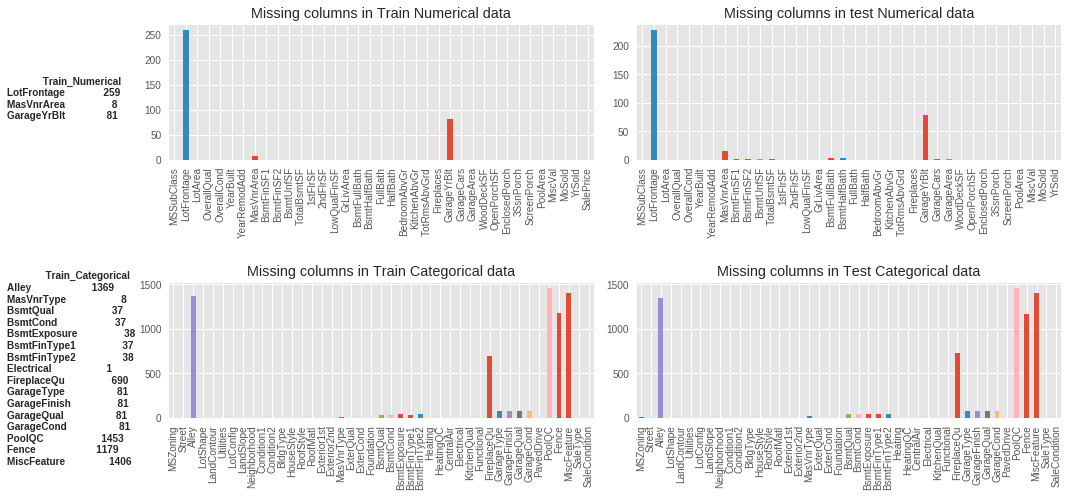

In [131]:
# simple matplotlib bar plot for numeric data
plt.figure(figsize = (16, 12))
plt.subplot(3, 2, 1)
train.select_dtypes(exclude = ['object']).isnull().sum().plot(kind='bar')
plt.figtext(-0.015, .77, str(x[x['Train_Numerical'] > 0]), {'size' : 10, 'fontweight' : 'bold'})
plt.title('Missing columns in Train Numerical data')

plt.subplot(3, 2, 2)
test.select_dtypes(exclude = ['object']).isnull().sum().plot(kind='bar')
#plt.figtext(1, .35, x[x[0] > 0])
plt.title('Missing columns in test Numerical data')

plt.subplot(3, 2, 3)
# simple matplotlib bar plot for object data
train.select_dtypes(include = ['object']).isnull().sum().plot(kind='bar')
plt.figtext(-0.015, .37, str(y[y['Train_Categorical'] > 0]), {'size' : 10, 'fontweight' : 'bold'})
plt.title('Missing columns in Train Categorical data')

plt.subplot(3, 2, 4)
test.select_dtypes(include = ['object']).isnull().sum().plot(kind='bar')
#plt.figtext(1, .35, y[y[0] > 0])
plt.title('Missing columns in Test Categorical data')

plt.subplots_adjust(hspace = 0.9, wspace = 0.1)

plt.show()

In [0]:
# seaborn heatmap for numeric data
# sns.heatmap(train.select_dtypes(exclude = ['object']).isnull(), cbar = False)
# plt.show()

In [0]:
# seaborn heatmap for object data
# sns.heatmap(train.select_dtypes(include = ['object']).isnull(), cbar = False)
# plt.show()

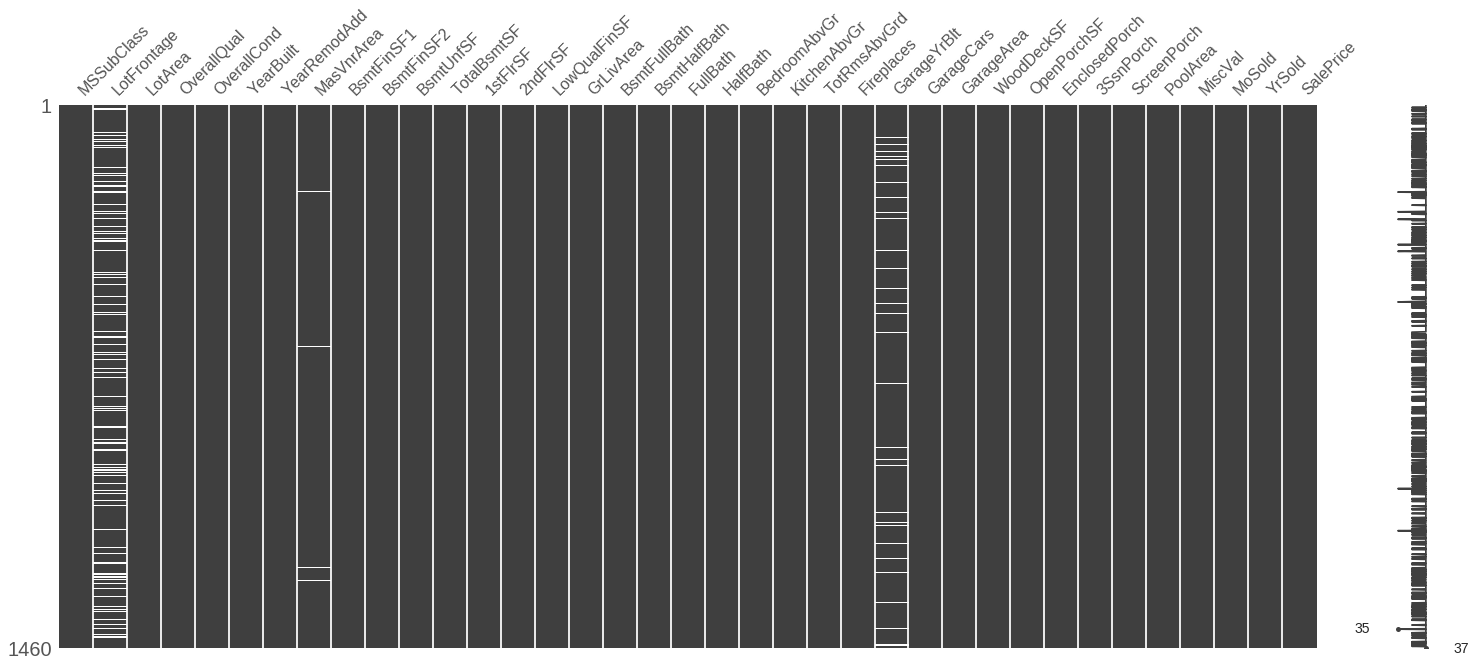

In [134]:
# missing numeric data with missingno
msno.matrix(train.select_dtypes(exclude = ['object']))
plt.show()

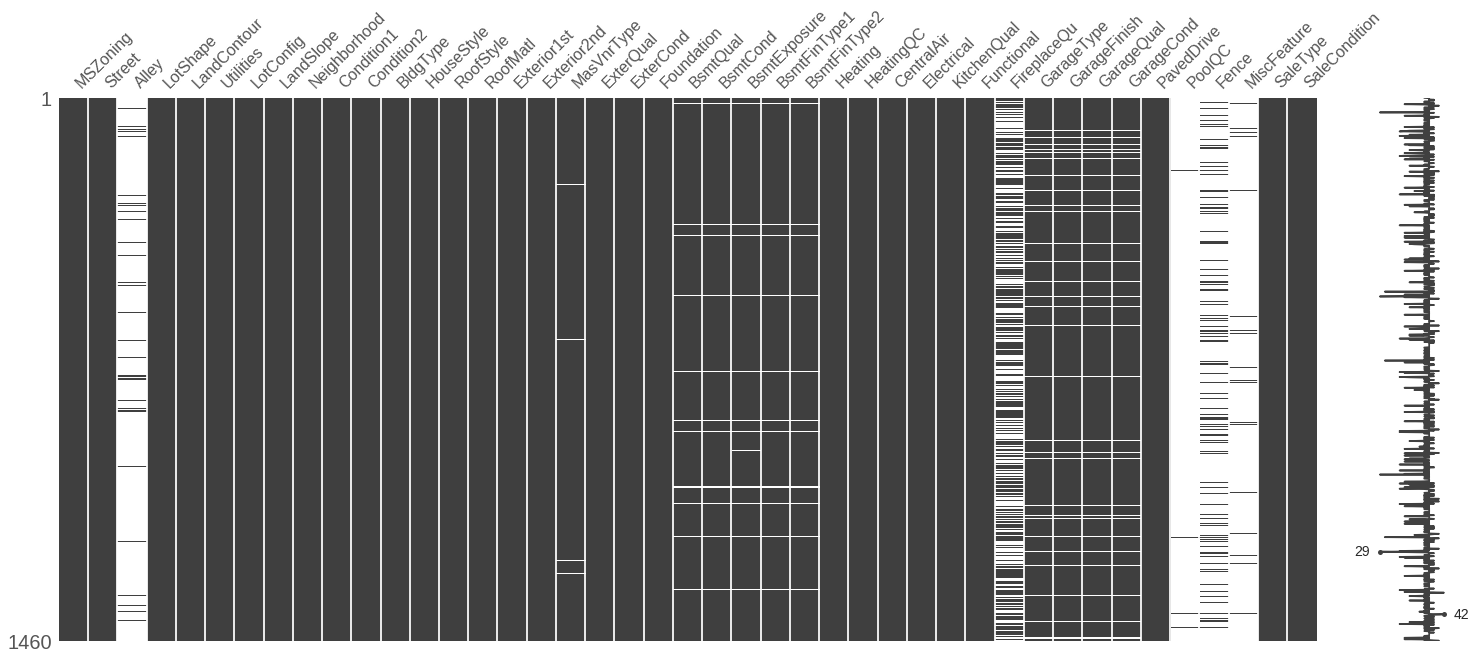

In [135]:
# missing object data with missingno
msno.matrix(train.select_dtypes(include = ['object']))
plt.show()

In [0]:
# Let’s look at the number of houses that were remodeled. As per to the data description, if the YearBuilt date is different 
# from the YearRemodAdd date then the house was remodeled.

In [137]:
(train.YearRemodAdd != train.YearBuilt).sum()

696

In [0]:
# 696 houses were remodeled

In [139]:
(train.YearRemodAdd == train.YearBuilt).sum()

764

In [0]:
# 764 houses were not remodeled

In [141]:
((train.YearRemodAdd != train.YearBuilt).sum())/(train.shape[0])

0.4767123287671233

In [0]:
count_train = pd.DataFrame({'yes' : ((train.YearRemodAdd != train.YearBuilt).sum()), 'no' : ((train.YearRemodAdd == train.YearBuilt).sum())}, index=[0])
count_test = pd.DataFrame({'yes' : ((test.YearRemodAdd != test.YearBuilt).sum()), 'no' : ((test.YearRemodAdd == test.YearBuilt).sum())}, index=[0])

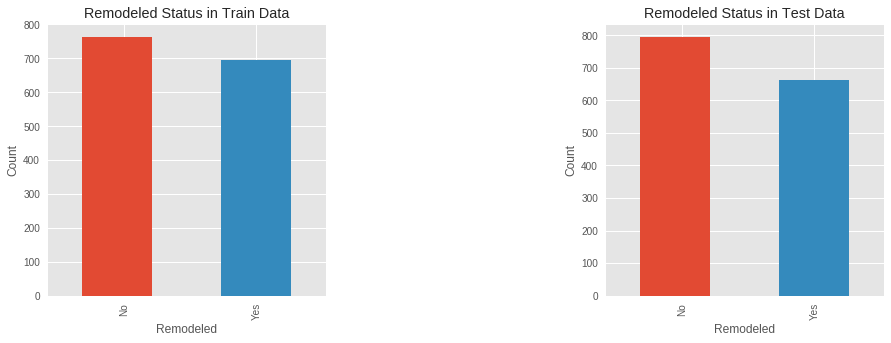

In [143]:
plt.figure(figsize = (15, 5) )
plt.subplot(1, 2, 1)
count_train.unstack().plot(kind = 'bar') # unstack( seperates both bars)
#or # subdata.Year.value_counts().plot.bar()
plt.title('Remodeled Status in Train Data')
plt.xlabel('Remodeled')
plt.ylabel('Count')
plt.xticks([.05 ,1], ['No', 'Yes'])

plt.subplot(1, 2, 2)
count_test.unstack().plot(kind = 'bar') # unstack( seperates both bars)
#or # subdata.Year.value_counts().plot.bar()
plt.title('Remodeled Status in Test Data')
plt.xlabel('Remodeled')
plt.ylabel('Count')
plt.xticks([.05 ,1], ['No', 'Yes'])

plt.subplots_adjust(wspace = 1)
plt.show()

In [144]:
# looking at description of numeric data
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [145]:
print('The percentage of data missing in train: ', (train.isnull().sum().sum())/(train.shape[0] * train.shape[1]))
print('The percentage of data missing in test: ', (test.isnull().sum().sum())/(test.shape[0] * test.shape[1]))

The percentage of data missing in train:  0.05963184931506849
The percentage of data missing in test:  0.06073173059404308


In [146]:
print('No. of duplicated rows: ', train.duplicated(subset = None, keep = 'first').sum())

No. of duplicated rows:  0


In [0]:
# we have to convert some of the data types from object to category

In [0]:
train_cat = train.select_dtypes(include = ['object']).apply(pd.Categorical)
test_cat = test.select_dtypes(include = ['object']).apply(pd.Categorical)

In [0]:
train_num = train.select_dtypes(exclude = ['object'])
test_num = test.select_dtypes(exclude = ['object'])

In [150]:
train.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 80 entries, MSSubClass to SalePrice
dtypes: float64(3), int64(34), object(43)
memory usage: 923.9+ KB


In [0]:
# Barplots for the categorical features

In [0]:
def category_bar():
    for i in range(0, 43):
        plt.subplot(9, 5, i + 1)
        #train[x].value_counts().plot(kind = 'bar')  # matplotlib code
        sns.countplot(x = train_cat.columns[i], data = train)  # seaborn code
        #plt.xlabel(train[i].astype(str).name) # extract name of column from input x
        plt.ylabel('')
        plt.xticks(rotation = -45)
        #plt.show()
        #return ''

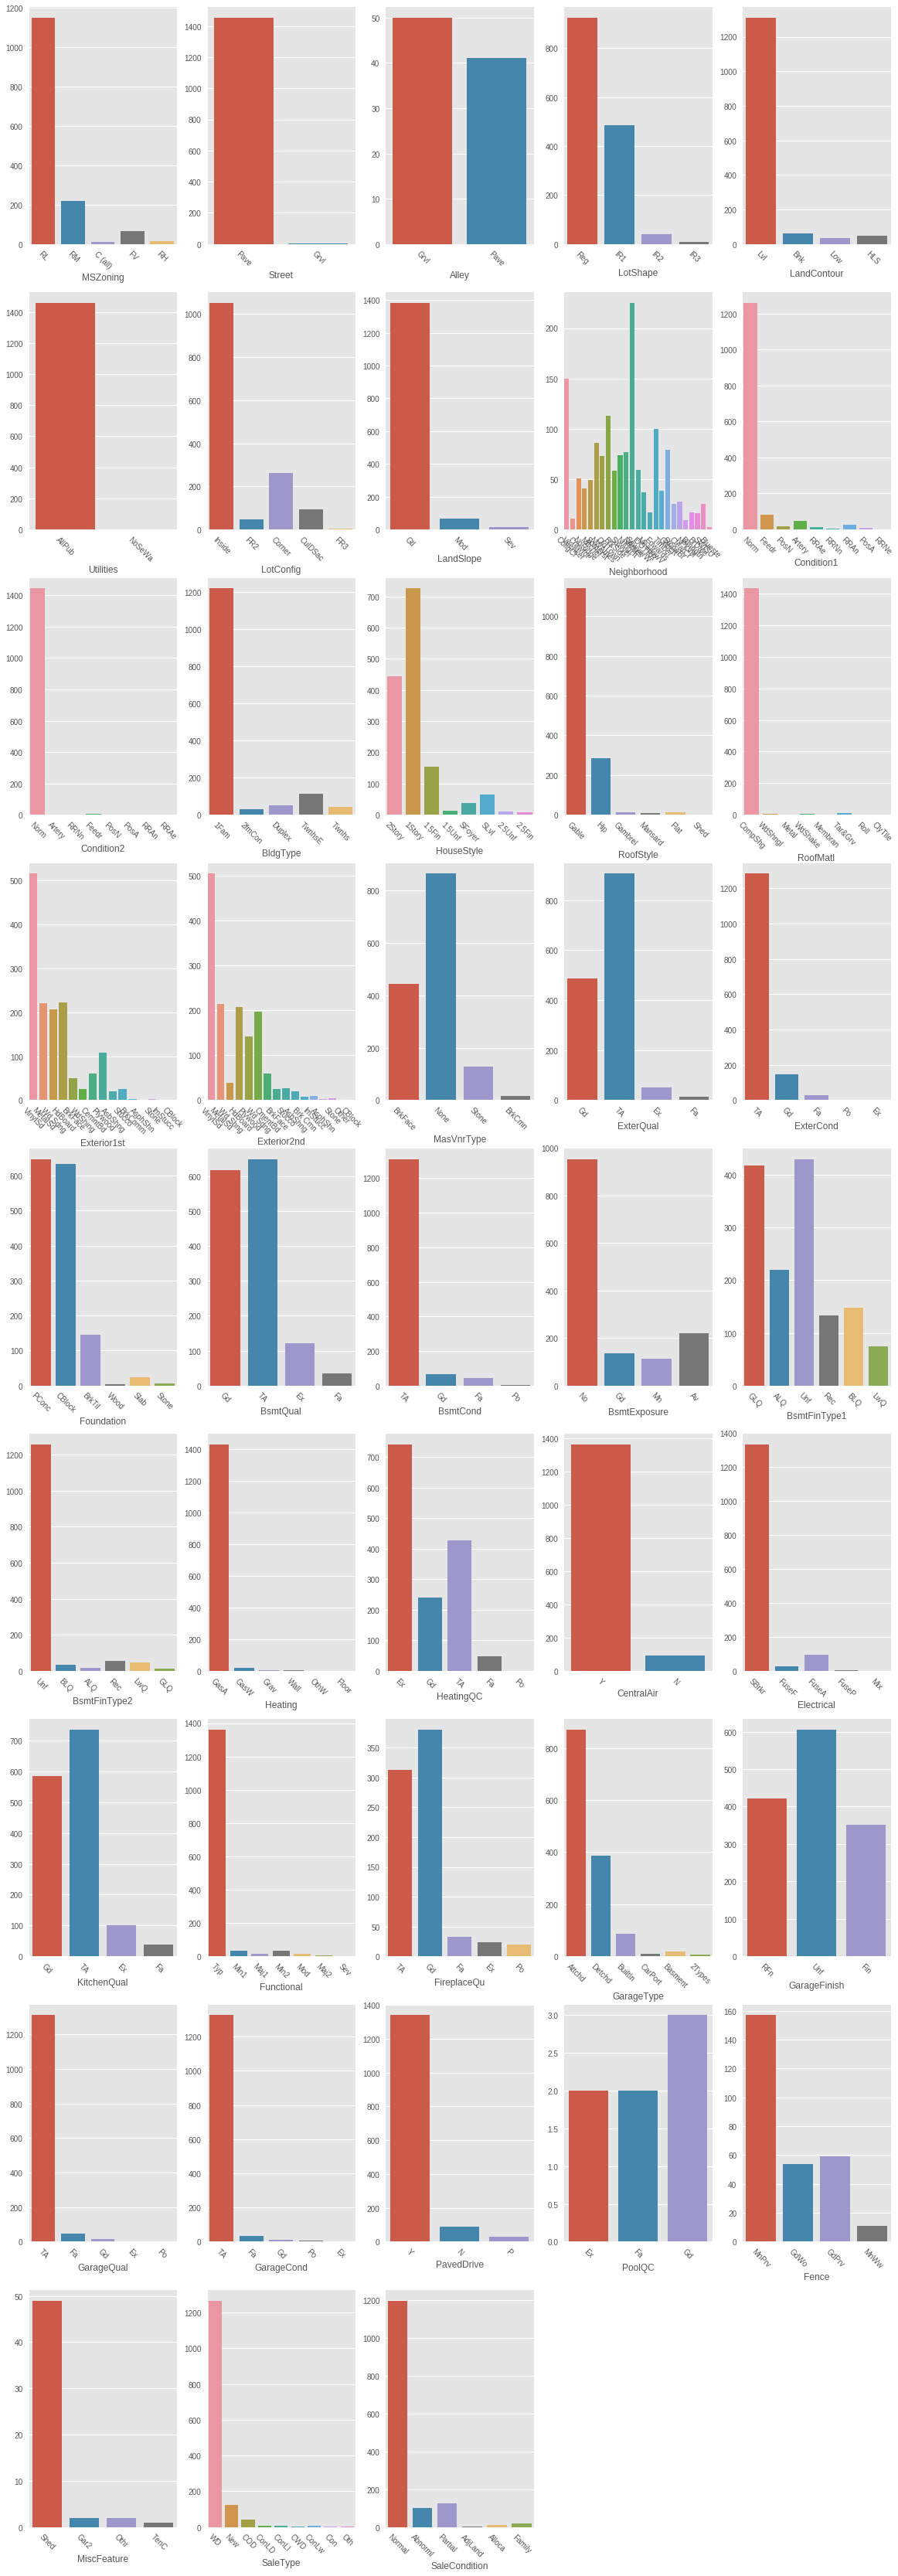

In [153]:
plt.figure(figsize = (20, 60))
category_bar()
plt.show()

In [0]:
# MSZoning: bar plot indicates that majority of the houses are located in low density residential areas and medium density 
# residential area.

# The type of road access to the property tends to be paved and the houses do not have alleys.

# Landcontour: the houses are built on flat properties
# Utilities: Almost all homes have all public utilities (E,G,W, & S)
# LandSlope: most of the properties have a gentle slope

In [0]:
# sns.barplot(x = train.Neighborhood.value_counts(), y = "Neighborhood", hue = "LandSlope",
#                  data = train, dodge = False)
# plt.title('Number of Subscribers per Year')
# plt.xlabel('Source')
# plt.ylabel('Number of Subscribers')
# plt.xticks(rotation = 45)
# plt.show()

In [0]:
# The houses that have sever landslope are located in the Clear Creek and Timberland. The houses with moderate landslope are 
# present in more neighborhood. The Clear Creek and the Crawford neighborhoods seem to have high slopes.

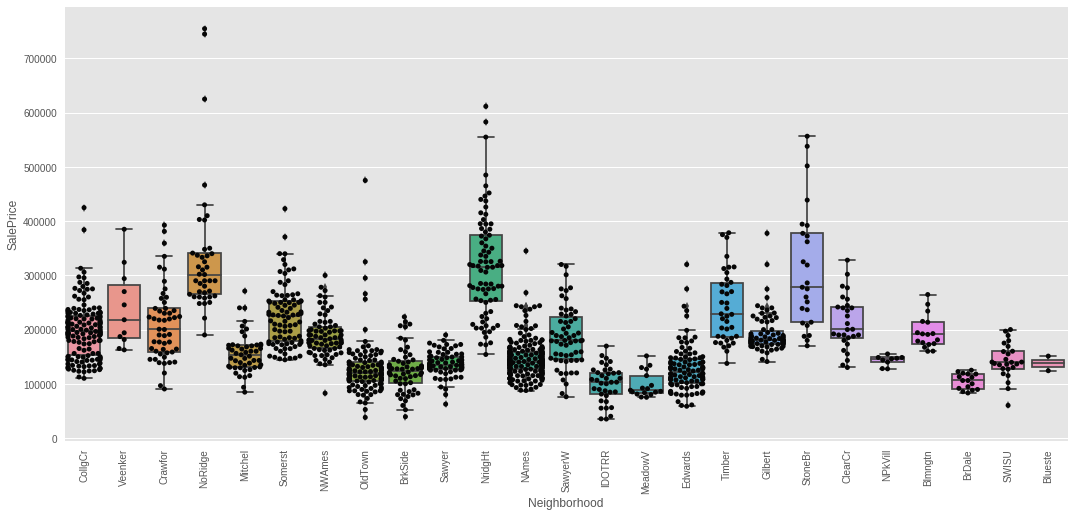

In [157]:
plt.figure(figsize=(18, 8))
sns.boxplot(x = "Neighborhood", y = "SalePrice", data = train)
sns.swarmplot(x = "Neighborhood", y = "SalePrice", data = train, color = ".025")
plt.xticks(rotation = 90)
plt.show()

In [0]:
# Plotting a boxplot between the neighboorhoods and sale price shows that BrookSide and South & West of Iowa State University have
# cheap houses. While Northridge and Northridge Heights are rich neighborhoods with several outliers in terms of price.

In [0]:
# Density plots for numeric variables
# Density plots of the features indicates that the features are skewed.

In [0]:
def num_density(x):
    #x.plot.kde() # matplotlib code
    sns.kdeplot(x, shade = True, color = "c")   # seaborn code
    plt.xlabel(x.astype(str).name) # extract name of column from input x
    #plt.show()

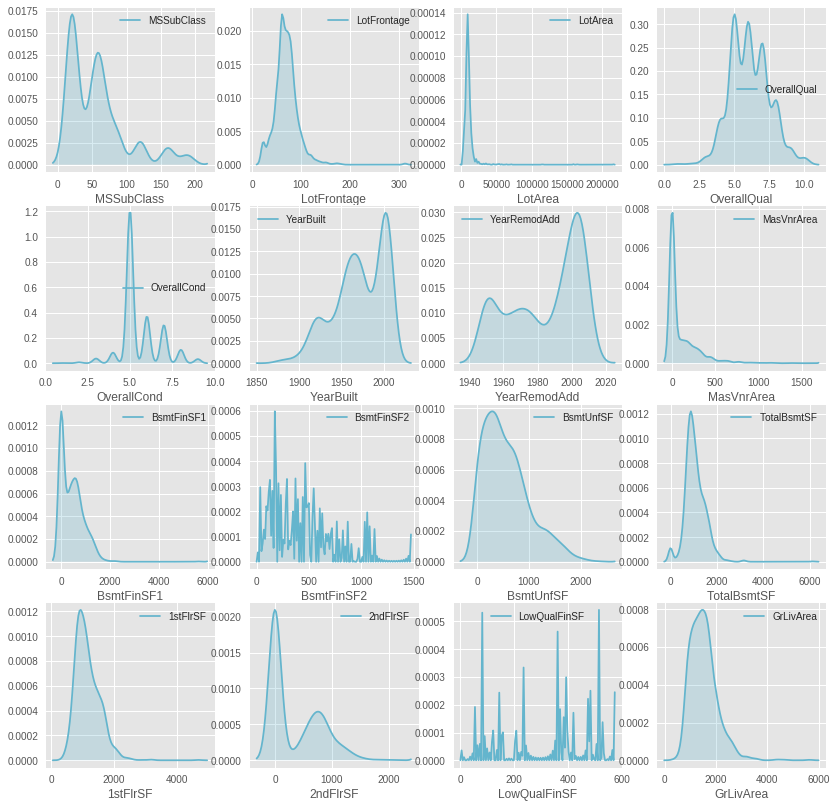

In [161]:
plt.figure(figsize = (14, 14))  # figure size
plt.subplot(4, 4, 1)  # figure array size of 4 x 4
num_density(train.MSSubClass)
plt.subplot(4, 4, 2)
num_density(train.LotFrontage)
plt.subplot(4, 4, 3)
num_density(train.LotArea)
plt.subplot(4, 4, 4)
num_density(train.OverallQual)
plt.subplot(4, 4, 5)
num_density(train.OverallCond)
plt.subplot(4, 4, 6)
num_density(train.YearBuilt)
plt.subplot(4, 4, 7)
num_density(train.YearRemodAdd)
plt.subplot(4, 4, 8)
num_density(train.MasVnrArea)
plt.subplot(4, 4, 9)
num_density(train.BsmtFinSF1)
plt.subplot(4, 4, 10)
num_density(train.BsmtFinSF2)
plt.subplot(4, 4, 11)
num_density(train.BsmtUnfSF)
plt.subplot(4, 4, 12)
num_density(train.TotalBsmtSF)
plt.subplot(4, 4, 13)
num_density(train['1stFlrSF'])
plt.subplot(4, 4, 14)
num_density(train['2ndFlrSF'])
plt.subplot(4, 4, 15)
num_density(train.LowQualFinSF)
plt.subplot(4, 4, 16)
num_density(train.GrLivArea)

plt.show()

In [0]:
# The denisty plot for YearBuilt shows that the data set contains a mix of new and old houses. It shows a downturn in the number of houses in recent years, possibily due to the housing crisis.

In [0]:
# Let's look at the correlation between the numerical columns

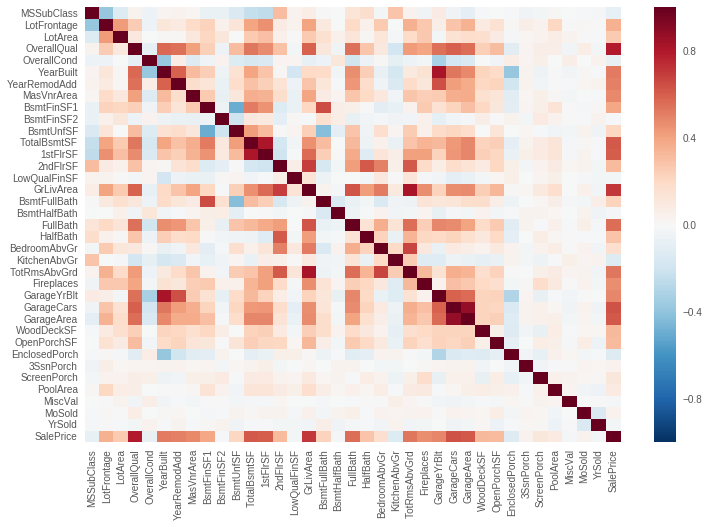

In [164]:
plt.figure(figsize = (12, 8))
sns.heatmap(train_num.corr())
plt.show()

In [165]:
pd.DataFrame(train_num.corr()['SalePrice'].sort_values(ascending=False)[1:12]).T #top 12 values

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt
SalePrice,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.486362


In [166]:
pd.DataFrame(train_num.corr()['SalePrice'].sort_values(ascending=False)[-5:]).T #last 5 values`

,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
SalePrice,-0.028923,-0.077856,-0.084284,-0.128578,-0.135907


In [0]:
# Here the OverallQual feature is 79% correlated with the target variable. Well, these make sense. People usually consider these
# parameters for their dream house. 

In [0]:
# Let's plot the ones with high correlation with SalePrice

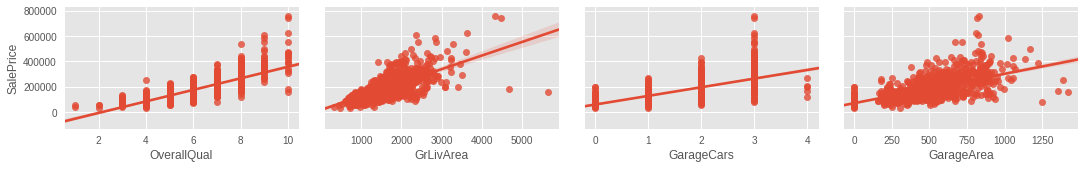

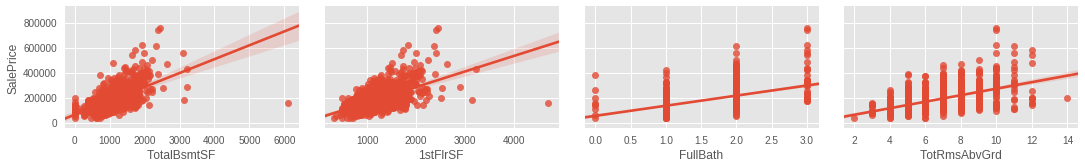

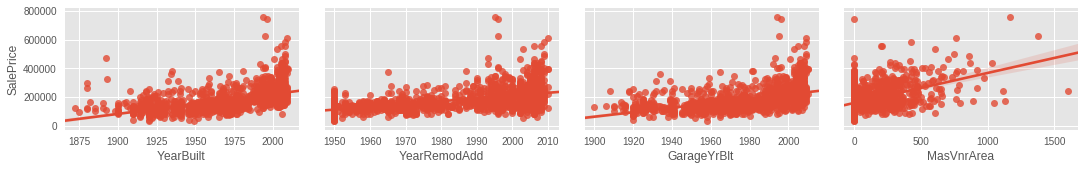

In [169]:
#list = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea']
list = pd.DataFrame(train_num.corr()['SalePrice'].sort_values(ascending=False)[1:13]).index

sns.pairplot(train_num, x_vars = list[0:4], y_vars = ["SalePrice"], aspect = 1.5, kind = "reg", palette="husl")
sns.pairplot(train_num, x_vars = list[4:8], y_vars = ["SalePrice"], aspect = 1.5, kind = "reg")
sns.pairplot(train_num, x_vars = list[8:], y_vars = ["SalePrice"], aspect = 1.5, kind = "reg")
plt.show()

In [0]:
# Also let's look at the outliers through box plots

In [0]:
def cat_box():
    for i in range(0, 43):
        plt.subplot(9, 5, i + 1)
        sns.boxplot(x = train_cat.iloc[:,i],  y=train_num["SalePrice"])  # seaborn code
        plt.ylabel('')
        plt.xticks(rotation = -45)
        #plt.show()
        #return ''

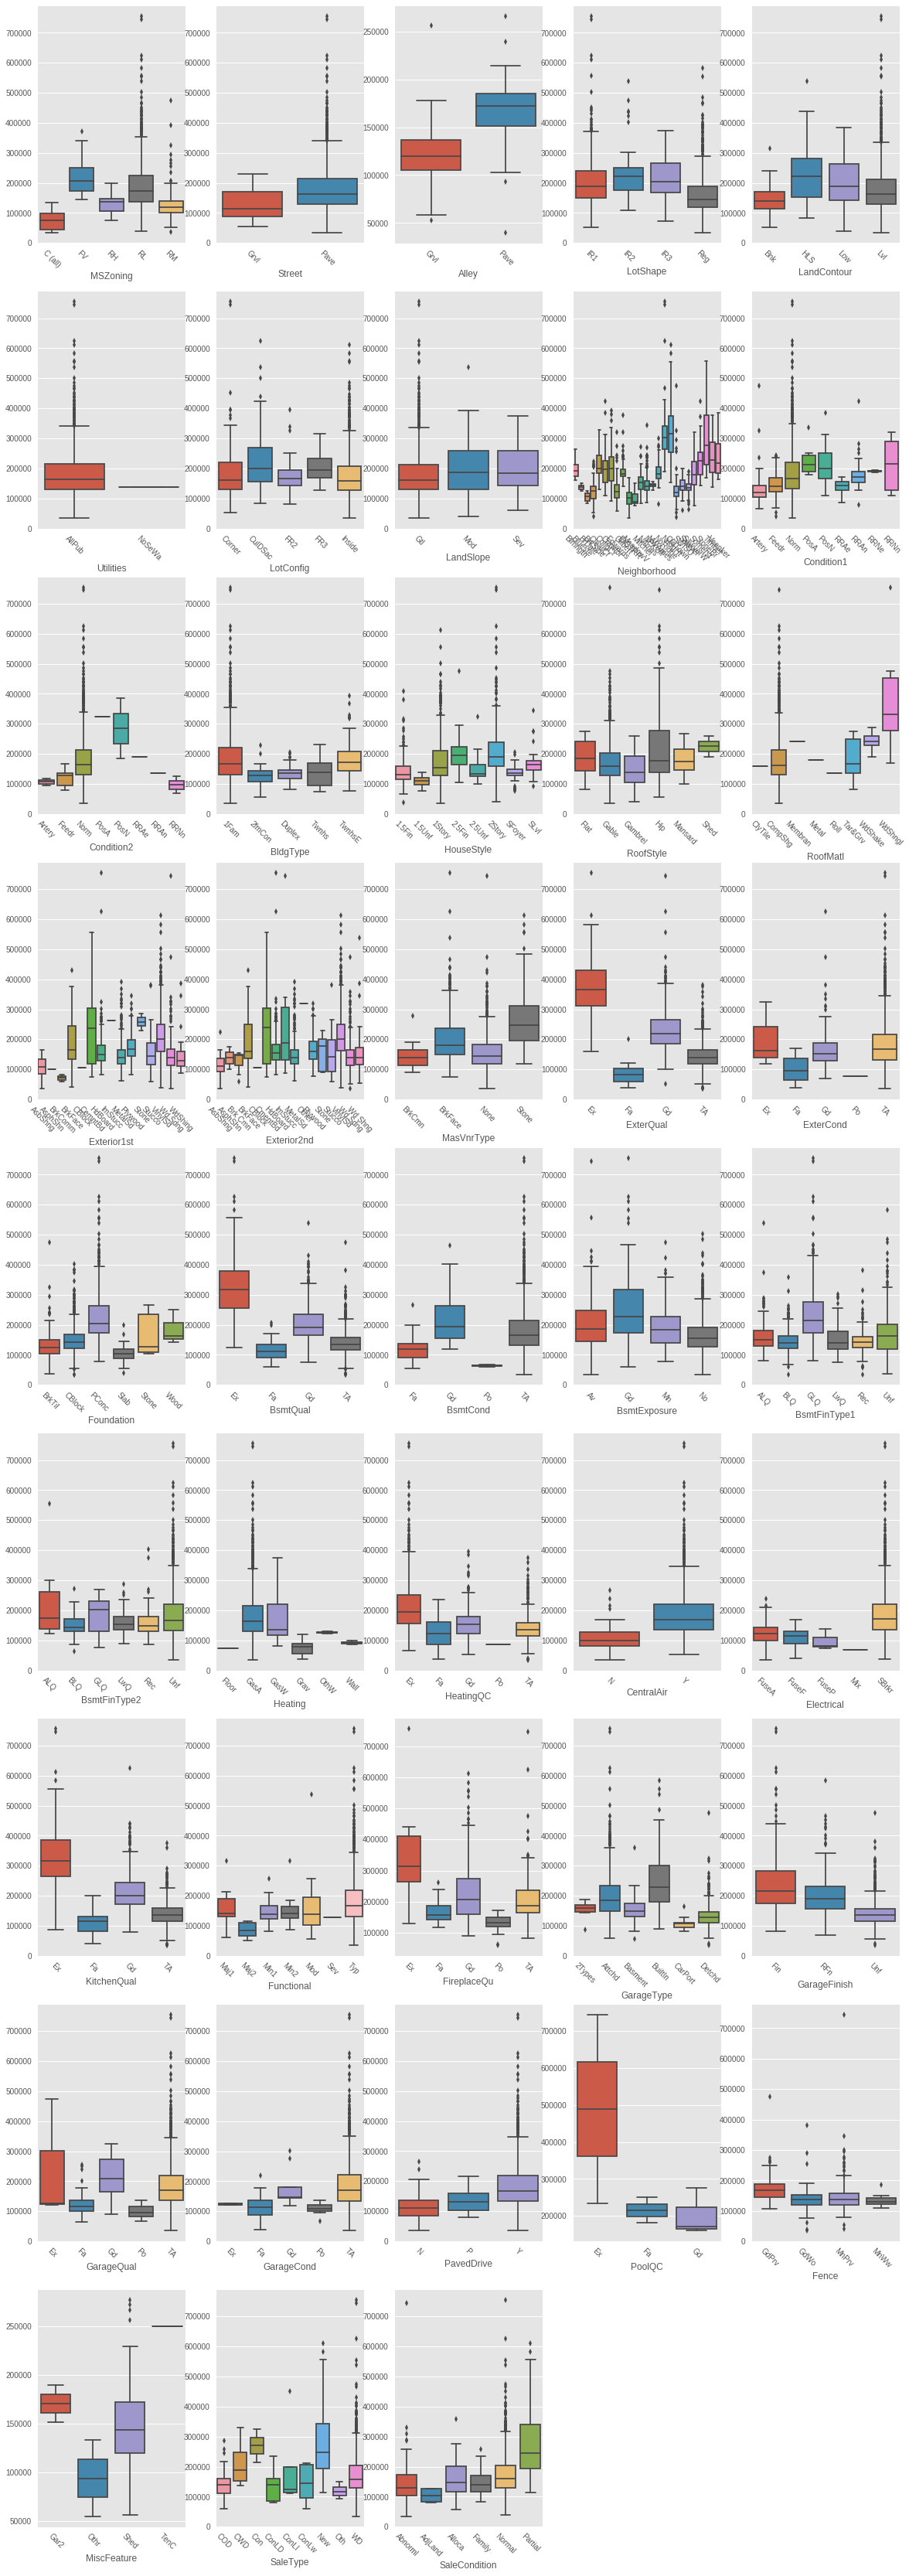

In [172]:
plt.figure(figsize = (20, 60))
cat_box()
plt.show()

In [0]:
# There are too many outliers, but all the data seems to be necessary, So we'll not remove outliers

In [0]:
# Let's fill all the missing values in categorical column with unavailable

In [0]:
for n in train_cat.columns:
     train_cat[n].replace(np.nan, 'Unavailable', inplace = True)
        
for n in test_cat.columns:
     test_cat[n].replace(np.nan, 'Unavailable', inplace = True)

In [0]:
train_num.fillna(0, inplace = True)
test_num.fillna(0, inplace = True)

In [177]:
# check if any more missing data is remaining
print('Null values in Train category data: ', train_cat.isnull().sum().sum())
print('Null values in Train numerical data: ', train_num.isnull().sum().sum())

print('Null values in Test category data: ', test_cat.isnull().sum().sum())
print('Null values in Test numerical data: ', test_num.isnull().sum().sum())

Null values in Train category data:  0
Null values in Train numerical data:  0
Null values in Test category data:  0
Null values in Test numerical data:  0


In [0]:
# now our data has no missing values

In [0]:
# also look at the skewness of SalesPrice

In [180]:
print('skewness: ', skew(train_num.SalePrice))

skewness:  1.880940746034036


In [0]:
# the SalesPrice data is skewed. let's try to unskew that

In [0]:
def unskew(x):
    log = skew(np.log(x))
    sqrt = skew(np.sqrt(x))
    insqrt = skew(1/np.sqrt(x))
    
    print('Log transformation gives ' + str(log) + ' skewness')
    print('Square Root transformation gives ' + str(sqrt) + ' skewness')
    print('Inverse Sq Root transformation gives ' + str(insqrt) + ' skewness')

In [183]:
unskew(train_num.SalePrice)

Log transformation gives 0.1212103673013655 skewness
Square Root transformation gives 0.9421834681211159 skewness
Inverse Sq Root transformation gives 0.8107604649531699 skewness


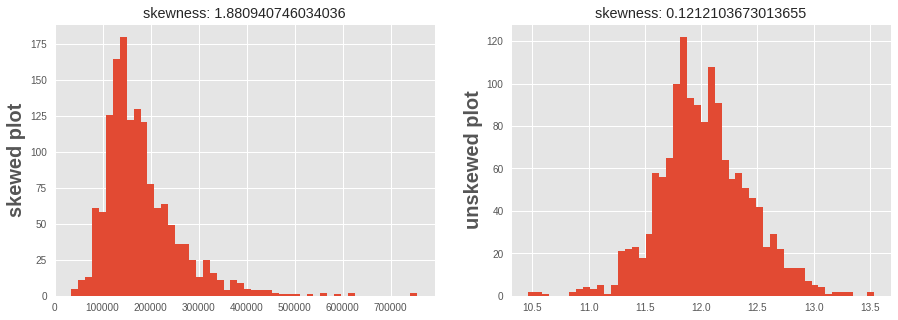

In [184]:
plt.figure(figsize = (15, 5))
plt.subplot(121)
train_num.SalePrice.hist(bins = 50)
plt.ylabel('skewed plot', {'size' : 20, 'fontweight' : 'bold'})
plt.title('skewness: ' + str(skew(train_num.SalePrice)))

plt.subplot(122)
np.log(train_num.SalePrice).hist(bins = 50)
plt.ylabel('unskewed plot', {'size' : 20, 'fontweight' : 'bold'})
plt.title('skewness: ' + str(skew(np.log(train_num.SalePrice))))

plt.show()

In [0]:
# unskewing SalePrice and storing it
train_num['SalePrice'] = np.log(train_num.SalePrice)

In [0]:
# we need to change our categorical to dummies for our machine learning

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

train_cat = train_cat.apply(le.fit_transform)
test_cat = test_cat.apply(le.fit_transform)

In [0]:
train = pd.concat([train_num, train_cat], axis = 1)
test = pd.concat([test_num, test_cat], axis = 1)

In [189]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [190]:
print('train data shape: ', train.shape, '\ntest data shape: ', test.shape)

train data shape:  (1460, 80) 
test data shape:  (1459, 79)


In [0]:
# now everything is in numerical format and no missing data

In [0]:
# let's apply few regression models to determine our Sales Price

In [0]:
X_train, X_val, y_train, y_val = train_test_split(train.drop('SalePrice', axis = 1), train.SalePrice, test_size = 0.25, random_state = 1234)

In [0]:
def model_reg(x):
    model = x
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    model_reg.modl = str(x).split("(")[0]
    model_reg.r2 = r2_score(y_val, y_pred)
    model_reg.mse = mean_squared_error(y_val, y_pred)
    model_reg.rmsle = np.sqrt(mean_squared_error(np.log(y_val), np.log(y_pred)))

In [0]:
models_list = [LinearRegression(fit_intercept = False),
             
               Ridge(alpha = 0.6, normalize = True, random_state=1234),
             
               SVR(kernel = 'linear', C = 0.1, epsilon = 0.7),
             
               BayesianRidge(alpha_2 = 3, fit_intercept = True, normalize = False),
             
               ARDRegression(compute_score=True),
             
               DecisionTreeRegressor(criterion = 'mse', max_depth = 5, random_state = 1234, max_leaf_nodes = 50),
             
               RandomForestRegressor(n_estimators = 120, criterion = 'mse', max_depth = 3, min_samples_split = 2, 
                                min_samples_leaf = 1, max_features = 30, max_leaf_nodes = 50, n_jobs = 1, 
                                random_state = 1234, verbose=  0),
             
               XGBRegressor(max_depth = 3, learning_rate = 0.1, n_estimators = 155, silent = True, objective = 'reg:linear', 
                       booster = 'gbtree', n_jobs = 1, gamma = 0, min_child_weight = 2, subsample = 1,
                       scale_pos_weight = 1, random_state = 1234, seed = 1234, importance_type = 'gain'),
             
               GradientBoostingRegressor(loss = 'ls', learning_rate = 0.1, n_estimators = 200, subsample = 1, 
                                    criterion = 'friedman_mse', min_samples_split = 5, min_samples_leaf = 1,
                                    max_depth = 3,  random_state = 1234, max_features = 50, alpha = 0.9, verbose = 0)]

In [196]:
start_time = time.clock()

name = []
r2 = []
mse = []
rmsle = []
for model in models_list:
    model_reg(model)
    name.append(model_reg.modl)
    r2.append(model_reg.r2)
    mse.append(model_reg.mse)
    rmsle.append(model_reg.rmsle)
    
print(time.clock() - start_time, "seconds")

df_r = pd.DataFrame({'Model Name': name, 
              'R2 Score' : r2, 
              'RMSLE' : rmsle,
              'MSE' : mse}).set_index('Model Name')

df_r

19.587563999999986 seconds


,MSE,R2 Score,RMSLE
Model Name,,,
LinearRegression,0.042310,0.732144,0.017911
Ridge,0.023305,0.852461,0.013033
SVR,0.072906,0.538451,0.022709
BayesianRidge,0.023010,0.854331,0.012926
ARDRegression,0.030435,0.807324,0.014788
DecisionTreeRegressor,0.044944,0.715472,0.018009
RandomForestRegressor,0.031086,0.803199,0.015074
XGBRegressor,0.018226,0.884615,0.011537
GradientBoostingRegressor,0.018059,0.885670,0.011445


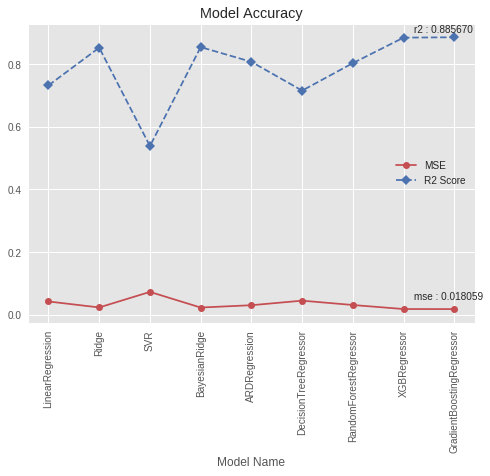

In [197]:
df_r['MSE'].plot(linestyle = '-', marker = 'o', color = 'r')
df_r['R2 Score'].plot(linestyle = '--', marker = 'D', color = 'b')
plt.xticks(np.arange(0, 9), df_r.index.tolist(), rotation = 90)
plt.title('Model Accuracy')
plt.legend()
plt.annotate('r2 : 0.885670', xy=(7.2, 0.9))
plt.annotate('mse : 0.018059', xy=(7.2, 0.05))
plt.show()

In [0]:
# The residuals plot shows the difference between residuals
# on the vertical axis and the dependent variable on the horizontal axis, 
# allowing us to detect regions within the target
# that may be susceptible to more or less error.

# Let's look for this with our best model

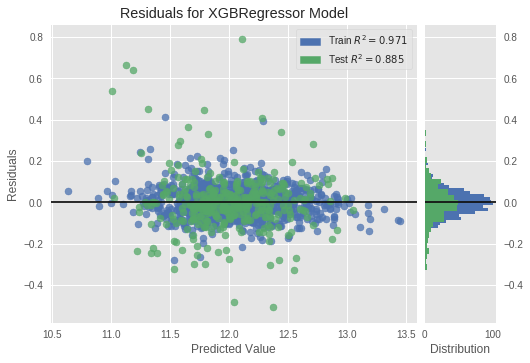

In [199]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer
xgbmodel = XGBRegressor(max_depth = 3, learning_rate = 0.1, n_estimators = 155, silent = True, objective = 'reg:linear', 
                       booster = 'gbtree', n_jobs = 1, gamma = 0, min_child_weight = 2, subsample = 1,
                       scale_pos_weight = 1, random_state = 1234, seed = 1234, importance_type = 'gain')

visualizer = ResidualsPlot(xgbmodel)
visualizer.fit(X_train, y_train) #
visualizer.score(X_val, y_val) # Evaluate the model on the test data
visualizer.poof()

In [0]:
# A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly
# dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a nonlinear
# model is more appropriate. In the case above, we see a fairly random, uniform distribution of the residuals
# against the target in two dimensions. This seems to indicate that our linear model is performing well. We can also
# see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted
# model.

In [0]:
# Prediction Error Plot

# A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model.
# This allows us to see how much variance is in the model. We can diagnose regression models using this
# plot by comparing against the 45 degree line, where the prediction exactly matches the model.

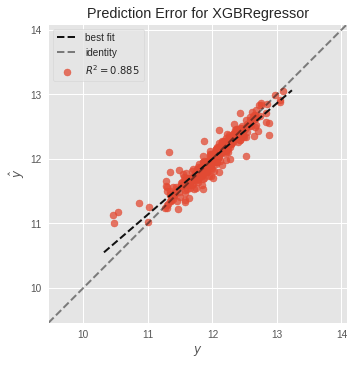

In [202]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
xgbmodel = XGBRegressor(max_depth = 3, learning_rate = 0.1, n_estimators = 155, silent = True, objective = 'reg:linear', 
                       booster = 'gbtree', n_jobs = 1, gamma = 0, min_child_weight = 2, subsample = 1,
                       scale_pos_weight = 1, random_state = 1234, seed = 1234, importance_type = 'gain')
visualizer = PredictionError(xgbmodel)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_val, y_val) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [0]:
# Let's apply the best model to predict Sale Price in Test data and look at top five values

In [204]:
test_Sale_Price = pd.DataFrame(XGBRegressor(max_depth = 3, learning_rate = 0.1, n_estimators = 155, silent = True, objective = 'reg:linear', 
                       booster = 'gbtree', n_jobs = 1, gamma = 0, min_child_weight = 2, subsample = 1,
                       scale_pos_weight = 1, random_state = 1234, 
                                            seed = 1234, importance_type = 'gain').fit(X_train, y_train).predict(test))
np.exp(test_Sale_Price).head()

,0
0,128147.804688
1,161438.171875
2,185737.843750
3,186415.546875
4,195637.015625


In [205]:
pd.concat([pd.DataFrame(test.index), np.exp(pd.DataFrame(GradientBoostingRegressor(loss = 'ls', learning_rate = 0.1, n_estimators = 200, subsample = 1, 
                                    criterion = 'friedman_mse', min_samples_split = 5, min_samples_leaf = 1,
                                    max_depth = 3,  random_state = 1234, max_features = 50, 
                          alpha = 0.9, verbose = 0).fit(X_train, y_train).predict(test), columns = ['SalePrice']))], axis = 1).head()#.to_csv('results.csv')

,Id,SalePrice
0,1461,126411.287530
1,1462,157993.004172
2,1463,184202.944322
3,1464,191527.894869
4,1465,187301.258676


In [0]:
# Let's look at the distribution of Sales Price predicted for test data

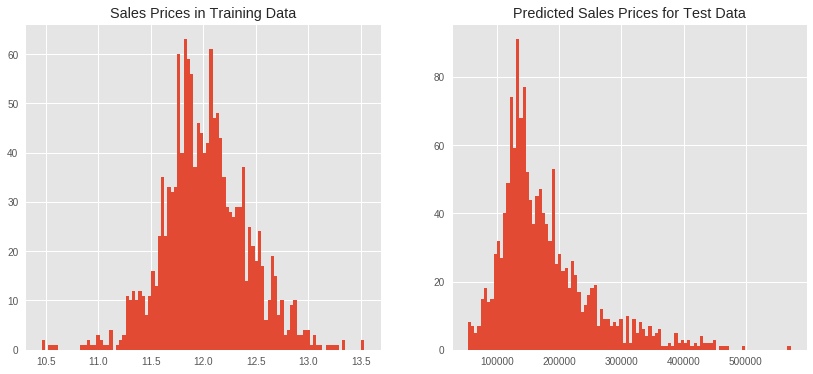

In [207]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.SalePrice, bins = 100)
plt.title('Sales Prices in Training Data')

plt.subplot(1, 2, 2)
plt.hist(np.exp(test_Sale_Price)[0], bins = 100)
plt.title('Predicted Sales Prices for Test Data')

plt.show()

In [0]:
# to store above data into a csv file
# np.exp(test_Sale_Price).to_csv('test_Sale_Price.csv')

In [0]:
from yellowbrick.target import BalancedBinningReference

In [0]:
# optimal number of bins, the BalancedBinningReference visualizer takes the target variable y as input and generates a histogram 
# with vertical lines indicating the recommended value points to ensure that the data is evenly distributed into each bin.

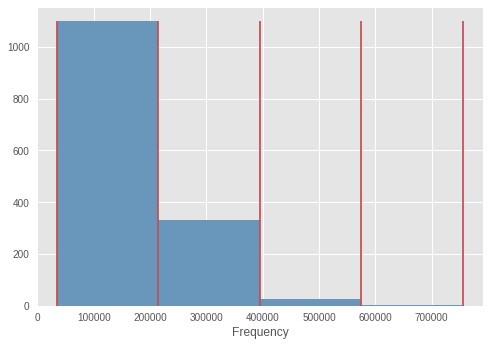

In [211]:
# Extract the target of interest
y = np.exp(train["SalePrice"])

# Instantiate the visualizer
visualizer = BalancedBinningReference()

visualizer.fit(y)          # Fit the data to the visualizer
visualizer.poof()          # Draw/show/poof the data

In [0]:
## or

In [0]:
# Let's define classes in Sales price and perform the logistic regression to predict the Sale Price ranges

In [0]:
# house_test2 = train[pd.DataFrame([set(X.columns).intersection(set(train.columns))]).T[0].tolist()]
# X = X[pd.DataFrame([set(X.columns).intersection(set(house_test.columns))]).T[0].tolist()]

bins = [30900, 130000, 163000, 214000, 800000]
names = [1, 2, 3, 4]

names1 = ['Cheap','Lower Range', 'Mid-Range', 'Expensive'] 

train['SalePrice'] = np.exp(train['SalePrice']) # convert back the Sales Price 
train['SalePriceRange'] = train['SalePrice']
train.SalePriceRange = pd.cut(train['SalePriceRange'], bins, labels = names)

In [0]:
Xc = train.drop(['SalePrice', 'SalePriceRange'], axis = 1)
yc = train.SalePriceRange

In [0]:
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xc, yc, test_size = 0.25, random_state = 1234)

In [0]:
# Looking at whether there is Class Balance

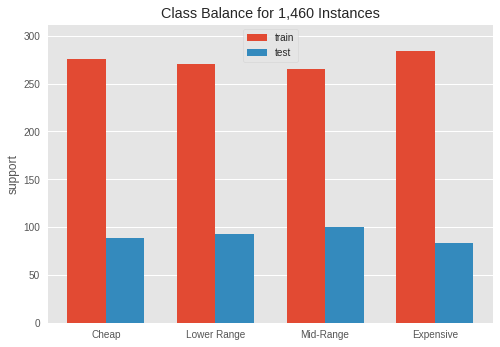

In [218]:
visualizer = ClassBalance(labels = names1)
visualizer.fit(yc_train, yc_val)
visualizer.poof()

In [0]:
# It's fairly balanced, we are not suffering from class imbalance.

In [0]:
def model_clf(x):
    model = x
    model.fit(Xc_train, yc_train)
    y_pred = model.predict(Xc_val)
    
    model_clf.cm = confusion_matrix(yc_val, y_pred)
    model_clf.modl = str(x).split("(")[0]
    model_clf.accuracy = accuracy_score(yc_val, y_pred)

In [0]:
models_list = [LogisticRegression(random_state = 1234),
             
               KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2),
             
               SVC(kernel = 'rbf', random_state = 1234),
             
               GaussianNB(),
             
               DecisionTreeClassifier(criterion = 'entropy', random_state = 1234),
             
               RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1234),
             
               XGBClassifier(base_score = 0.5, colsample_bylevel = 1, colsample_bytree = 1,
                                   gamma = 0, learning_rate = 0.1, max_delta_step = 0, max_depth = 15,
                                   min_child_weight = 1, missing = None, n_estimators = 800, nthread = -1,
                                   objective = 'binary:logistic', reg_alpha = 0, reg_lambda = 1,
                                   scale_pos_weight = 1, seed = 1234, silent = True, subsample = 1),
             
               GradientBoostingClassifier(random_state = 1234)]

In [222]:
start_time = time.clock()

name = []
accuracy = []
conf = []
for mdl in models_list:
    model_clf(mdl)
    name.append(model_clf.modl)
    accuracy.append(model_clf.accuracy)
    conf.append(model_clf.cm)
    
print(time.clock() - start_time, "seconds")

df_ac = pd.DataFrame({'Model Name': name, 
              'Accuracy' : accuracy, 
              'Confusion Matrix' : conf}).set_index('Model Name')

df_ac

23.675691999999998 seconds


,Accuracy,Confusion Matrix
Model Name,,
LogisticRegression,0.731507,"[[77, 10, 2, 0], [18, 55, 19, 1], [2, 23, 57, ..."
KNeighborsClassifier,0.569863,"[[72, 10, 7, 0], [33, 36, 19, 5], [15, 24, 42,..."
SVC,0.230137,"[[1, 0, 0, 88], [0, 0, 0, 93], [0, 0, 0, 100],..."
GaussianNB,0.704110,"[[81, 7, 1, 0], [36, 37, 19, 1], [7, 10, 67, 1..."
DecisionTreeClassifier,0.671233,"[[65, 23, 1, 0], [21, 53, 18, 1], [5, 16, 62, ..."
RandomForestClassifier,0.720548,"[[78, 10, 1, 0], [23, 54, 16, 0], [3, 21, 64, ..."
XGBClassifier,0.758904,"[[80, 8, 1, 0], [20, 55, 17, 1], [1, 15, 70, 1..."
GradientBoostingClassifier,0.761644,"[[79, 9, 1, 0], [18, 58, 16, 1], [2, 17, 67, 1..."


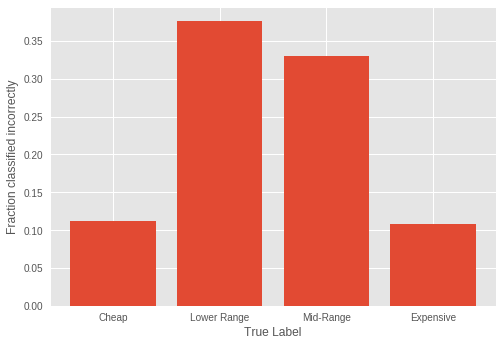

In [224]:
# Let's see which category has most incorrect predictions
label_frac_error = 1 - np.diag(df_ac['Confusion Matrix'][-1]) / np.sum(df_ac['Confusion Matrix'][-1], axis=1)
plt.bar(np.arange(4), label_frac_error)
plt.xlabel('True Label')
plt.xticks([0, 1, 2, 3], names1)
plt.ylabel('Fraction classified incorrectly')
plt.show()

In [0]:
# most of the data for Lower Range was classified incorrectly

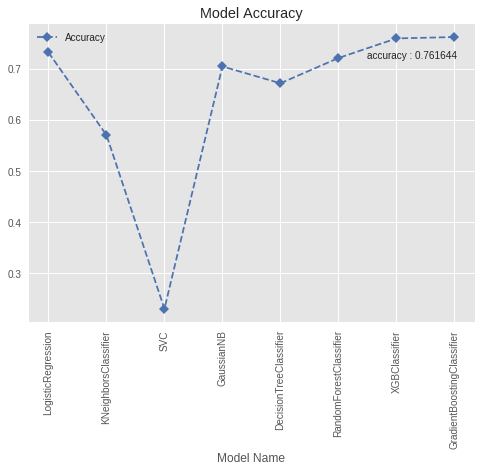

In [226]:
df_ac['Accuracy'].plot(linestyle = '--', marker = 'D', color = 'b')
plt.xticks(np.arange(0, 8), df_ac.index, rotation = 90)
plt.title('Model Accuracy')
plt.annotate('accuracy : 0.761644', xy = (5.5, 0.720))
plt.legend()
plt.show()

In [0]:
# Class Prediction Error

# The class prediction error chart provides a way to quickly understand how good our classifier is at predicting the right
# classes.

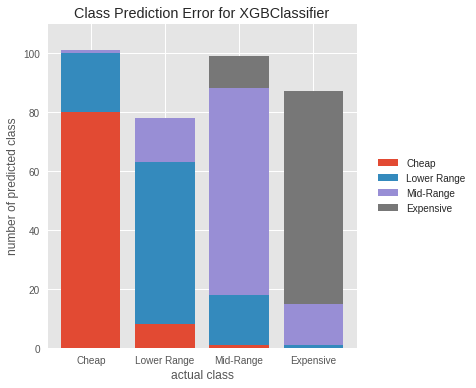

In [228]:
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(XGBClassifier(base_score = 0.5, colsample_bylevel = 1, colsample_bytree = 1,
                                   gamma = 0, learning_rate = 0.1, max_delta_step = 0, max_depth = 15,
                                   min_child_weight = 1, missing = None, n_estimators = 800, nthread = -1,
                                   objective = 'multi:softprob', reg_alpha = 0, reg_lambda = 1,
                                   scale_pos_weight = 1, seed = 1234, silent = True, subsample = 1), classes = names1)
# Fit the training data to the visualizer
visualizer.fit(Xc_train, yc_train)
# Evaluate the model on the test data
visualizer.score(Xc_val, yc_val)
# Draw visualization
g = visualizer.poof()

In [0]:
# let's look at the important columns in the model with the best accuracy, ie XgBoost

In [0]:
m = (GradientBoostingClassifier(random_state = 1234).fit(Xc_train, yc_train))

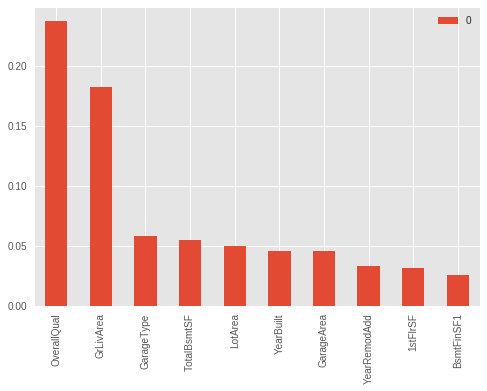

In [231]:
x = pd.DataFrame(m.feature_importances_, Xc_train.columns)

pd.DataFrame(x[0].sort_values(ascending = False).head(10)).plot.bar()
plt.show()

In [232]:
pd.DataFrame(m.predict(test))[0].value_counts()

2    481
1    341
4    340
3    297
Name: 0, dtype: int64

In [0]:
# our predicted classes are evenly distributed